# Suprema corte
> EDA of FB Pages and FB Groups containing 'suprema corte' in 2023 

In [1]:
from mexican_polarization.Loader import Loader
from mexican_polarization.Analyzer import Analyzer
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
suprema_csv = "/Users/gerardoguerrero/mexican-polarization/nbs/datalake/2024-01-11-11-15-02-CST-Historical-Report-Medios-Anti-4T-supremacorte-2018-01-01--2024-01-01.csv"
loader = Loader(csv = suprema_csv, virtue_dict = "virtue2.txt", vice_dict= "vice2.txt")
loader.eliminate_word("suprema","virtue")

In [3]:
loader.process_csv(text_cols=['Page Name', 'Message'], num_cols=['Total Interactions'], date_cols=['Post Created'])

In [4]:
df = loader.processed
df

,Page Name,Message,Total Interactions,Post Created
0,latinus,gobierno de amlo no ha aclarado el plan para q...,258.0,2023-12-31 17:04:18 CST
1,reformacom,opinion debe preocuparnos la falta de conocimi...,58.0,2023-12-28 09:30:00 CST
2,radio formula,pum a inicios de ano la suprema corte de justi...,132.0,2023-12-26 15:00:48 CST
3,radio formula,lomasvistode2023 el unico camino es que la min...,112.0,2023-12-25 21:15:50 CST
4,radio formula,lomasvisto el analista luis carlos ugalde advi...,295.0,2023-12-25 06:00:05 CST
...,...,...,...,...
2033,reformacom,legisladores y activistas pidieron al nuevo pr...,88.0,2019-01-03 07:30:01 CST
2034,radio formula,con 7 votos la suprema corte lo eligio como el...,9.0,2019-01-02 15:45:00 CST
2035,reformacom,con 7 votos a favor la suprema corte de justic...,159.0,2019-01-02 15:00:11 CST
2036,milenio,perfil dentro de su curriculum es abogado egre...,240.0,2019-01-02 14:17:37 CST


In [5]:
analyzer = Analyzer(loader)

In [6]:
df = analyzer.moral_words_count('Message')

In [7]:
df2 = analyzer.get_moral_df(df)
df2

/Users/gerardoguerrero/anaconda3/lib/python3.10/site-packages/mexican_polarization/Analyzer.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moral['VVRate'] = df.apply(lambda row: (row['Virtue words count'] + row['Vice words count']) / row['Total words'], axis=1)
/Users/gerardoguerrero/anaconda3/lib/python3.10/site-packages/mexican_polarization/Analyzer.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moral['Vice Rate'] = df.apply(lambda row: row['Vice words count'] / row['Total words'], axis=

,Page Name,Message,Total Interactions,Post Created,Vice words count,Vice words,Virtue words count,Virtue words,Total words,Sum vice and virtue,VVRate,Vice Rate,Virtue Rate,Category,Original Message
577,milenio,suprema corte invalida acuerdo que clasifica o...,401.0,2023-05-18 15:10:59 CDT,1,[invalida],3,"[acuerdo, seguridad, nacional]",12,4,0.33,0.08,0.25,Virtue,Suprema Corte INVALIDA acuerdo que clasifica o...
243,latinus,el peligroso poder judicial federal latinus in...,506.0,2023-10-22 08:33:02 CDT,1,[peligroso],1,[judicial],7,2,0.29,0.14,0.14,Virtue,El peligroso Poder Judicial federal. #Latinus ...
1664,radio formula,de acuerdo con los senadores la ley de la indu...,32.0,2021-04-26 22:38:01 CDT,0,[],6,"[acuerdo, ley, principios, legalidad, segurida...",21,6,0.29,0.00,0.29,Virtue,De acuerdo con los senadores la Ley de la Indu...
232,milenio,no puede haber gobierno rico con pueblo pobre,80.0,2023-10-24 15:19:44 CDT,2,"[rico, pobre]",0,[],8,2,0.25,0.25,0.00,Vice,“No puede haber gobierno rico con pueblo pobre”.
623,milenio,el mandatario asegura que son unos abusivos ve...,83.0,2023-05-11 16:40:50 CDT,2,"[abusivos, ventajosos]",0,[],8,2,0.25,0.25,0.00,Vice,"El mandatario asegura que son ""unos abusivos, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,radio formula,ahora si agarrense la unam ahora podra anular ...,633.0,2023-04-14 15:55:02 CDT,0,[],1,[justicia],70,1,0.01,0.00,0.01,Virtue,¡Ahora sí agárrense! ⚡La UNAM ahora podrá anul...
188,radio formula,ultimahora el presidente amlo acepto la renunc...,544.0,2023-11-08 10:20:36 CST,0,[],1,[justicia],76,1,0.01,0.00,0.01,Virtue,#ÚltimaHora 🚨 El presidente AMLO aceptó la ren...
791,radio formula,queda suspendido plan b de amlo el ministro de...,NaN,2023-03-24 21:09:19 CST,0,[],1,[maximo],71,1,0.01,0.00,0.01,Virtue,¡Queda suspendido Plan B de AMLO! 🗳️🚫 El minis...
155,latinus,loret el presidente lopez obrador volvio a dar...,NaN,2023-11-15 22:08:47 CST,1,[ningun],0,[],70,1,0.01,0.01,0.00,Vice,#Loret. El presidente López Obrador volvió a d...


In [9]:
df_vice = df2[df2['Category'] == 'Vice']
df_vice.sort_values(by=['Vice Rate'], ascending=False, inplace=True)
df_vice2 = df_vice[['Page Name','Original Message','Total Interactions','Post Created','VVRate','Vice Rate','Virtue Rate','Category']]
df_vice2 = df_vice2.drop_duplicates(subset='Original Message', keep='first')
df_vice2

/var/folders/hx/2yrhw82s29g3zhsqchyrqcy80000gn/T/ipykernel_1854/308509358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vice.sort_values(by=['Vice Rate'], ascending=False, inplace=True)


,Page Name,Original Message,Total Interactions,Post Created,VVRate,Vice Rate,Virtue Rate,Category
232,milenio,“No puede haber gobierno rico con pueblo pobre”.,80.0,2023-10-24 15:19:44 CDT,0.25,0.25,0.00,Vice
623,milenio,"El mandatario asegura que son ""unos abusivos, ...",83.0,2023-05-11 16:40:50 CDT,0.25,0.25,0.00,Vice
1898,latinus,La Suprema Corte tumba la #LeyBonilla: “Era un...,NaN,2020-05-11 14:08:03 CDT,0.17,0.17,0.00,Vice
1964,radio formula,Eduardo Medina Mora aseguró que la información...,84.0,2019-10-04 07:43:56 CDT,0.15,0.15,0.00,Vice
1718,latinus,"Corte invalida ""Ley Garrote"" de Tabasco la cua...",251.0,2021-03-02 18:47:37 CST,0.19,0.14,0.05,Vice
...,...,...,...,...,...,...,...,...
533,radio formula,Tras una manifestación en contra de la Suprema...,848.0,2023-05-27 00:00:51 CDT,0.02,0.02,0.00,Vice
774,radio formula,¡Es que se le chispoteó!🤯 Enrique Galván Ochoa...,142.0,2023-03-28 11:06:37 CST,0.04,0.02,0.01,Vice
1360,radio formula,Margarita Zavala acusó al ministro presidente ...,89.0,2022-02-24 17:40:00 CST,0.01,0.01,0.00,Vice
155,latinus,#Loret. El presidente López Obrador volvió a d...,NaN,2023-11-15 22:08:47 CST,0.01,0.01,0.00,Vice


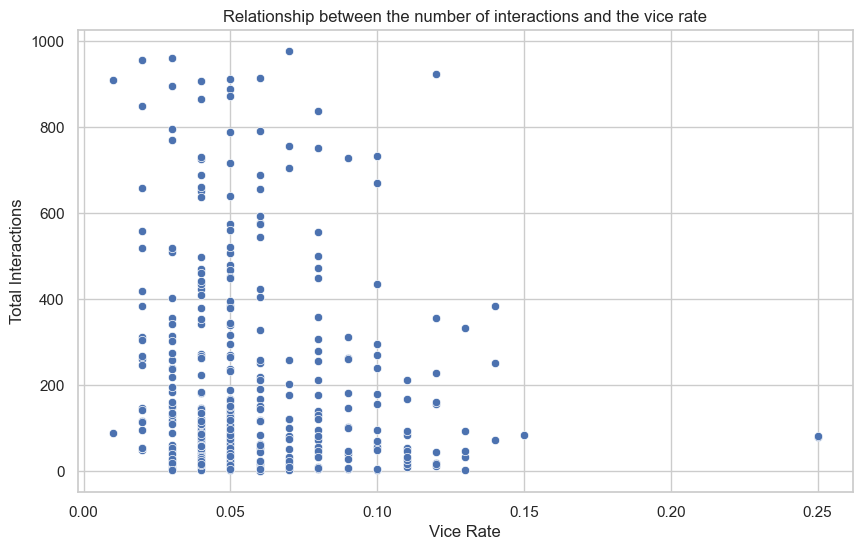

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Vice Rate", y="Total Interactions", data=df_vice2)
plt.title('Relationship between the number of interactions and the vice rate')
plt.show()

In [22]:
df_virtue = df2[df2['Category'] == 'Virtue']
df_virtue.sort_values(by=['Virtue Rate'], ascending=False, inplace=True)
df_virtue2 = df_virtue[['Page Name','Original Message','Total Interactions','Post Created','VVRate','Vice Rate','Virtue Rate','Category']]
df_virte2 = df_virtue2.drop_duplicates(subset='Original Message', keep='first')
df_virtue2

/var/folders/hx/2yrhw82s29g3zhsqchyrqcy80000gn/T/ipykernel_1854/1651821020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virtue.sort_values(by=['Virtue Rate'], ascending=False, inplace=True)


,Page Name,Original Message,Total Interactions,Post Created,VVRate,Vice Rate,Virtue Rate,Category
1664,radio formula,De acuerdo con los senadores la Ley de la Indu...,32.0,2021-04-26 22:38:01 CDT,0.29,0.00,0.29,Virtue
577,milenio,Suprema Corte INVALIDA acuerdo que clasifica o...,401.0,2023-05-18 15:10:59 CDT,0.33,0.08,0.25,Virtue
2023,milenio,"PAN, PRI y PRD juntos por una buena causa.",NaN,2019-02-16 01:35:00 CST,0.22,0.00,0.22,Virtue
741,milenio,"#ÚLTIMAHORA | Por mayoría de ocho votos, el Pl...",201.0,2023-04-18 14:27:01 CDT,0.21,0.00,0.21,Virtue
986,milenio,Calificó el hecho como “histórico”.,75.0,2023-01-02 17:45:47 CST,0.20,0.00,0.20,Virtue
...,...,...,...,...,...,...,...,...
292,latinus,#Loret. El pleito por los libros de texto lo g...,NaN,2023-10-04 23:22:58 CDT,0.03,0.01,0.01,Virtue
1402,radio formula,Luego de que la Suprema Corte resolvió que no ...,62.0,2021-12-24 13:45:01 CST,0.01,0.00,0.01,Virtue
41,radio formula,"🚨 Por segunda ocasión, el Senado de la Repúbli...",330.0,2023-12-14 08:00:19 CST,0.02,0.01,0.01,Virtue
1184,radio formula,#EspecialRadioFórmula | A casi un año de que l...,98.0,2022-08-01 16:45:00 CDT,0.03,0.01,0.01,Virtue


In [24]:
df_vice_grouped = df_vice2.groupby('Page Name').agg({'Total Interactions':'sum', 'Vice Rate':'mean'}).reset_index()
df_vice_grouped.sort_values(by=['Total Interactions'], ascending=False, inplace=True)
df_vice_grouped = df_vice_grouped[df_vice_grouped['Total Interactions'] > 0]
df_vice_grouped


,Page Name,Total Interactions,Vice Rate
0,latinus,25752.0,0.063559
2,radio formula,25364.0,0.053760
3,reformacom,16533.0,0.054078
1,milenio,7317.0,0.063016


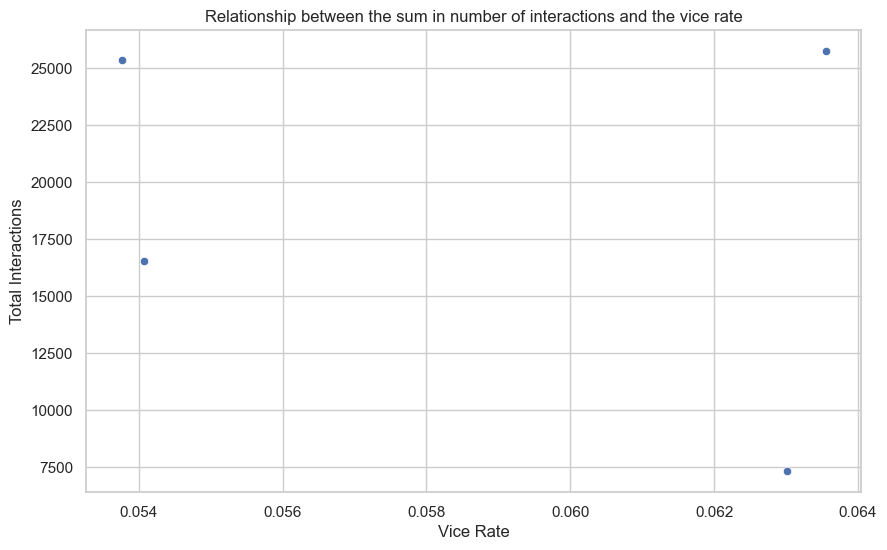

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Vice Rate", y="Total Interactions", data=df_vice_grouped)
plt.title('Relationship between the sum in number of interactions and the vice rate')
plt.show()

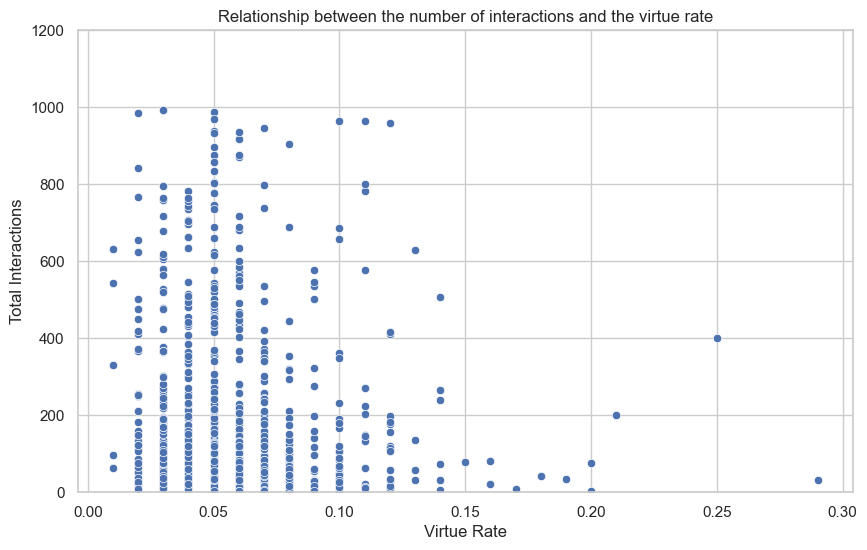

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Virtue Rate", y="Total Interactions", data=df_virtue2)
plt.ylim(0, 1200)
plt.title('Relationship between the number of interactions and the virtue rate')
plt.show()